<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Phase_space_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

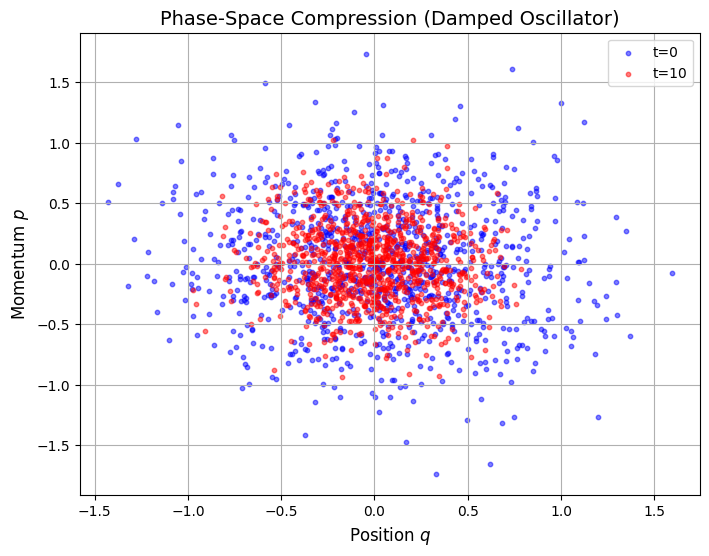

In [2]:
# %% [markdown]
# ## Figure 7: Classical Phase-Space Compression
# **Purpose**: Simulate a damped harmonic oscillator to visualize phase-space compression.

# %%
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
m = 1.0          # Mass
k = 1.0          # Spring constant
zeta = 0.1       # Damping coefficient
tau = 1.0        # Relaxation time
N = 1000         # Number of particles
t_span = [0, 10] # Time span
t_eval = np.linspace(t_span[0], t_span[1], 100)  # Time points

# Initial conditions (Gaussian distribution)
q0 = np.random.normal(0, 0.5, N)  # Initial positions
p0 = np.random.normal(0, 0.5, N)  # Initial momenta

# Equations of motion
def damped_oscillator(t, y):
    q, p = y
    dpdt = -k * q - (zeta * tau / m) * p
    dqdt = p / m
    return [dqdt, dpdt]

# Initialize arrays
q = np.zeros((len(t_eval), N))  # Fix: Define q first
p = np.zeros_like(q)            # Now p references q correctly

# Assign initial conditions
q[0, :] = q0
p[0, :] = p0

# Simulate trajectories
for i in range(1, len(t_eval)):
    for j in range(N):
        sol = solve_ivp(
            damped_oscillator,
            [t_eval[i-1], t_eval[i]],
            [q[i-1, j], p[i-1, j]],
            t_eval=[t_eval[i]],
            rtol=1e-6
        )
        q[i, j], p[i, j] = sol.y[:, 0]

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(q[0], p[0], s=10, alpha=0.5, label="t=0", c='blue')
plt.scatter(q[-1], p[-1], s=10, alpha=0.5, label=f"t={t_span[1]}", c='red')
plt.xlabel("Position $q$", fontsize=12)
plt.ylabel("Momentum $p$", fontsize=12)
plt.title("Phase-Space Compression (Damped Oscillator)", fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig("figure7_phase_space.pdf", bbox_inches='tight')
plt.show()